In [355]:
from transformers import BridgeTowerProcessor, BridgeTowerImageProcessor
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F

In [124]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("BridgeTower/bridgetower-base")

config.json: 100%|██████████| 1.51k/1.51k [00:00<?, ?B/s]
pytorch_model.bin: 100%|██████████| 1.31G/1.31G [00:37<00:00, 34.6MB/s]


In [125]:
model

BridgeTowerModel(
  (cross_modal_text_transform): Linear(in_features=768, out_features=768, bias=True)
  (cross_modal_image_transform): Linear(in_features=768, out_features=768, bias=True)
  (token_type_embeddings): Embedding(2, 768)
  (vision_model): BridgeTowerVisionModel(
    (visual): BridgeTowerVisionTransformer(
      (embeddings): BridgeTowerVisionEmbeddings(
        (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
        (position_embedding): Embedding(325, 768)
      )
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): BridgeTowerTransformer(
        (resblocks): ModuleList(
          (0-11): 12 x BridgeTowerResidualAttention(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): ModuleDict(
              (c

In [162]:
from transformers import BridgeTowerProcessor, BridgeTowerModel
import requests
from PIL import Image

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "hello world"

processor = BridgeTowerProcessor.from_pretrained("BridgeTower/bridgetower-base")
model = BridgeTowerModel.from_pretrained("BridgeTower/bridgetower-base")
# Prepare inputs
encoding = processor(image, text, return_tensors="pt")
# Forward pass
outputs = model(**encoding)
outputs.keys()
#odict_keys(['text_feats', 'image_feats', 'pooler_output'])


odict_keys(['text_features', 'image_features', 'pooler_output'])

In [165]:
outputs.image_features.shape

torch.Size([1, 325, 768])

#### Try with pytorch

In [270]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

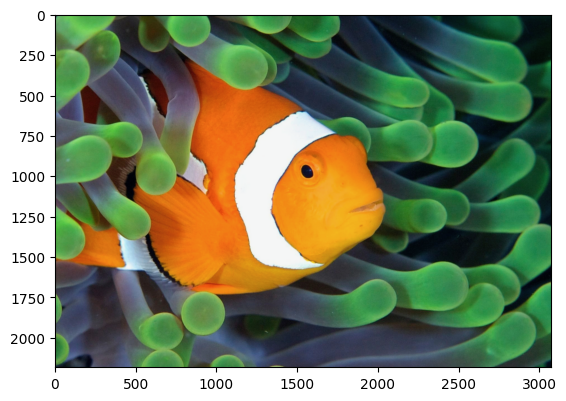

In [271]:
image = Image.open(str('tensorflow_tutorial\images\clown-fish.png'))
plt.imshow(image)

In [272]:
model = model = AutoModel.from_pretrained("BridgeTower/bridgetower-base")

In [194]:
# Get relevant layers: Start with only convolutional layer
model_weights = []

conv_layers = []

model_children = list(model.children())

# #counter to keep count of the conv layers
# counter = 0
# #append all the conv layers and their respective wights to the list
# for i in range(len(model_children)):
#     if type(model_children[i]) == nn.Conv2d:
#         counter+=1
#         model_weights.append(model_children[i].weight)
#         conv_layers.append(model_children[i])
#     elif type(model_children[i]) == nn.Sequential:
#         for j in range(len(model_children[i])):
#             for child in model_children[i][j].children():
#                 if type(child) == nn.Conv2d:
#                     counter+=1
#                     model_weights.append(child.weight)
#                     conv_layers.append(child)
# print(f"Total convolution layers: {counter}")
# print("conv_layers")

vision_model = list(model_children[3].children())
vision_model = list(vision_model[0].children())
patch_embedding = list(vision_model[0].children())
patch_embedding = patch_embedding[0]

In [273]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [274]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 256, 256])
Image shape after: torch.Size([1, 3, 256, 256])


In [195]:
image = patch_embedding(image)
output = image
name = (str(patch_embedding))
print(output.shape)

torch.Size([1, 768, 16, 16])


In [196]:
feature_map = output.squeeze(0)
gray_scale = torch.sum(feature_map,0)
gray_scale = gray_scale / feature_map.shape[0]
fm = gray_scale.data.cpu().numpy()
print(fm.shape)

(16, 16)


Text(0.5, 1.0, 'Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)')

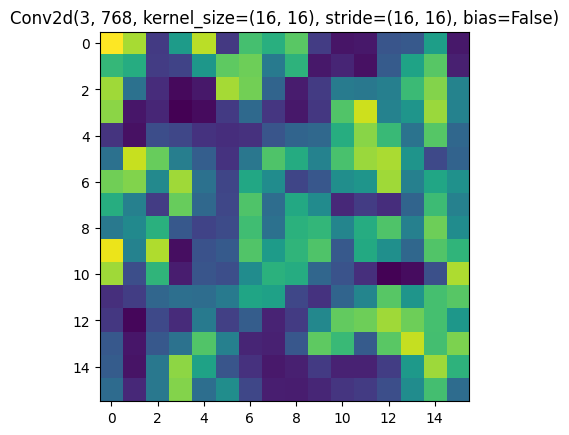

In [197]:
plt.imshow(fm)
plt.title(name)

#### Now let's add all layers

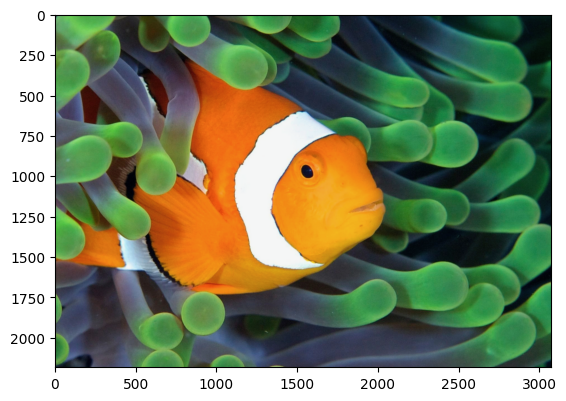

In [248]:
# Reset tranformer and image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

model = model = AutoModel.from_pretrained("BridgeTower/bridgetower-base")

image = Image.open(str('tensorflow_tutorial\images\clown-fish.png'))
plt.imshow(image)

In [245]:
# Get relevant layers: Start with only convolutional layer
model_weights = []

layers = []

model_children = list(model.children())

#counter to keep count of the conv layers
counter = 0

#append all the conv layers and their respective wights to the list
for i in range(len(model_children)):
    # Check if grandchildren exist
    if len(list(model_children[i].children())) < 1:
        counter += 1
        # model_weights.append(model_children[i].weight)
        layers.append(model_children[i])
    else:
        model_gchildren = list(model_children[i].children())
        # Check for g grandchildren
        for i in range(len(model_gchildren)):
            if len(list(model_gchildren[i].children())) < 1:
                counter += 1
                # model_weights.append(model_gchildren[i].weight)
                layers.append(model_gchildren[i])
            else:
                model_ggchildren = list(model_gchildren[i].children())
                # Check for gg grandchildren
                for i in range(len(model_ggchildren)):
                    if len(list(model_ggchildren[i].children())) < 1:
                        counter += 1
                        # model_weights.append(model_ggchildren[i].weight)
                        layers.append(model_ggchildren[i])
                    else:
                        model_gggchildren = list(model_ggchildren[i].children())
                        # Check for ggg grandchildren
                        for i in range(len(model_gggchildren)):
                            if len(list(model_gggchildren[i].children())) < 1:
                                counter += 1
                                # model_weights.append(model_gggchildren[i].weight)
                                layers.append(model_gggchildren[i])
                            else:
                                model_ggggchildren = list(model_gggchildren[i].children())
                                # Check for ggg grandchildren
                                for i in range(len(model_ggggchildren)):
                                    if len(list(model_ggggchildren[i].children())) < 1:
                                        counter += 1
                                        # model_weights.append(model_gggchildren[i].weight)
                                        layers.append(model_ggggchildren[i])
                                    else:
                                        model_gggggchildren = list(model_ggggchildren[i].children())
                                        # Check for ggg grandchildren
                                        for i in range(len(model_gggggchildren)):
                                            if len(list(model_gggggchildren[i].children())) < 1:
                                                counter += 1
                                                # model_weights.append(model_gggchildren[i].weight)
                                                layers.append(model_gggggchildren[i])
                                        else:
                                            model_ggggggchildren = list(model_gggggchildren[i].children())
                                            # Check for ggg grandchildren
                                            for i in range(len(model_ggggggchildren)):
                                                if len(list(model_ggggggchildren[i].children())) < 1:
                                                    counter += 1
                                                    # model_weights.append(model_gggchildren[i].weight)
                                                    layers.append(model_ggggggchildren[i])

print(f"Total convolution layers: {counter}")
print(layers)

Total convolution layers: 378
[Linear(in_features=768, out_features=768, bias=True), Linear(in_features=768, out_features=768, bias=True), Embedding(2, 768), Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False), Embedding(325, 768), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwise_affine=True), LayerNorm((768,), eps=1e-05, elementwis

In [249]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [250]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 256, 256])
Image shape after: torch.Size([1, 3, 256, 256])


In [251]:
# Generate feature maps
outputs = []
names = []
flat_layer = []
for layer in layers[0:]:
    if 'Linear' in str(layer):
        flat_layer.append(layer)
    elif 'Embedding' in str(layer):
        flat_layer.append(layer)
    elif 'LayerNorm' in str(layer):
        flat_layer.append(layer)
    else:
        print(layer)
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=0.1, inplace=False)
Dropout(p=0.1, inplace=False)
GELUActivation()
Dropout(p=

In [252]:
flat_layer

[Linear(in_features=768, out_features=768, bias=True),
 Linear(in_features=768, out_features=768, bias=True),
 Embedding(2, 768),
 Embedding(325, 768),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNorm((768,), eps=1e-05, elementwise_affine=True),
 LayerNo

In [253]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(

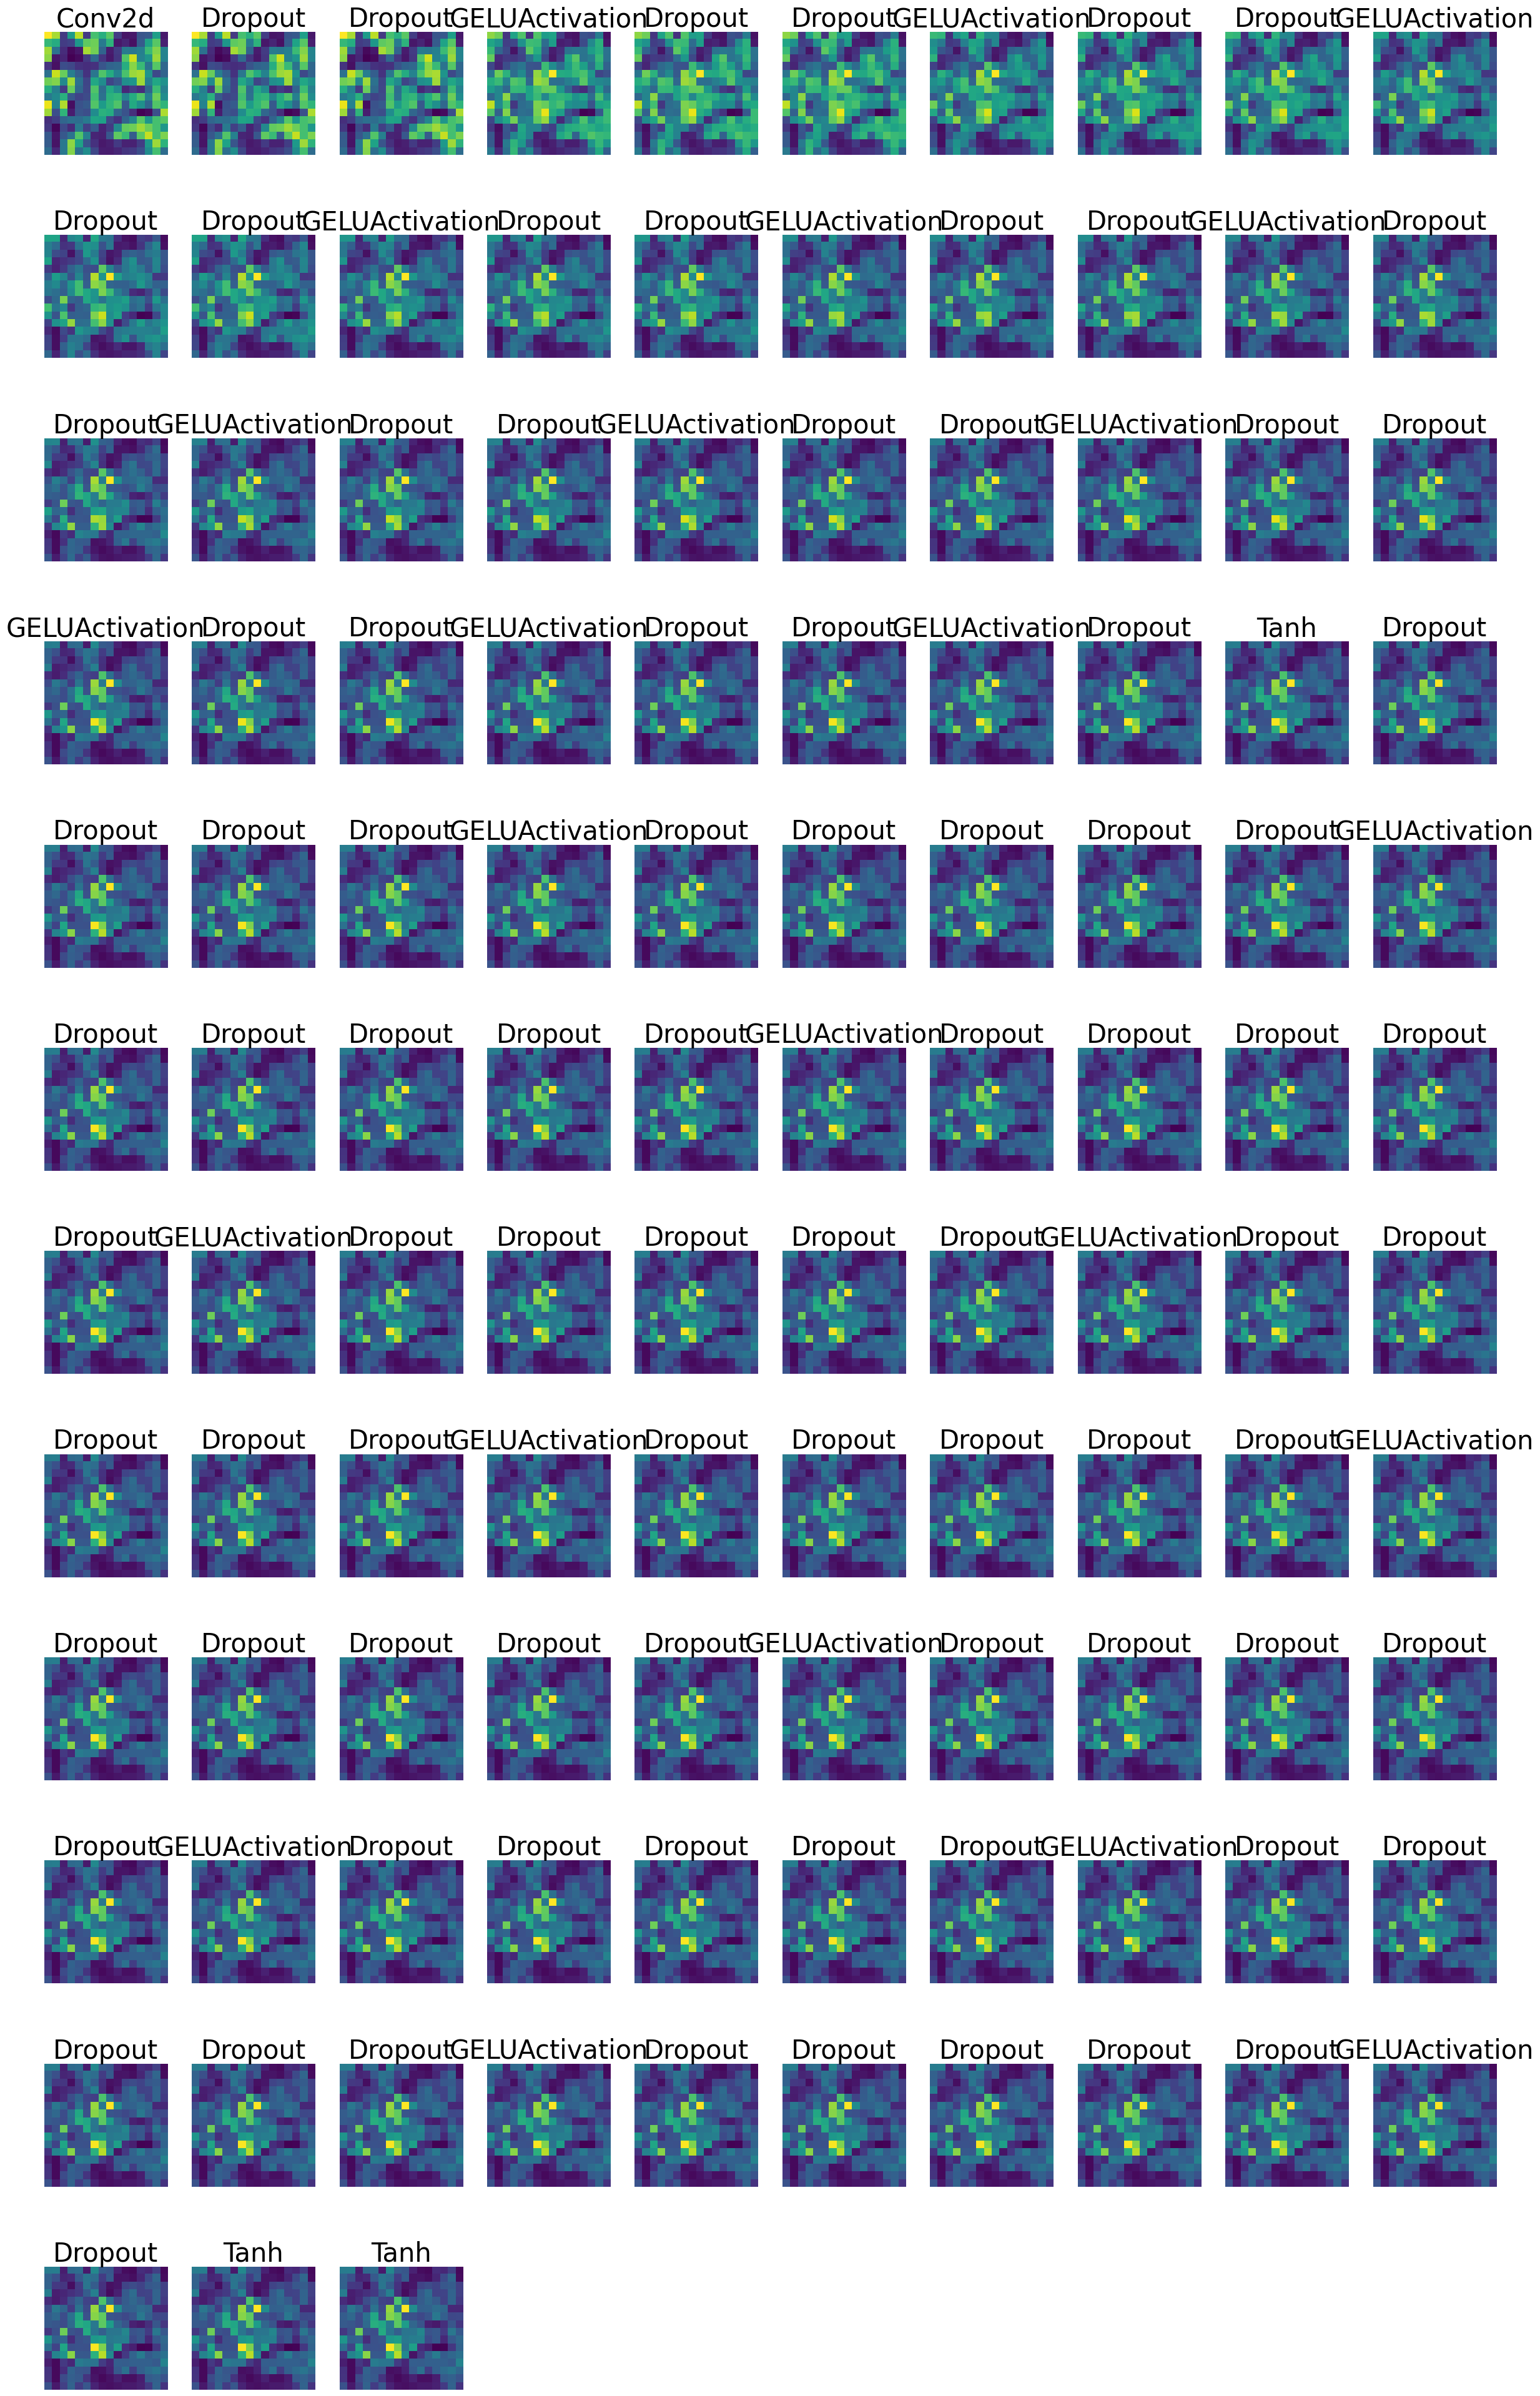

In [254]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(12, 10, i+1)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(str('feature_maps.jpg'), bbox_inches='tight')

#### Now use hooks to do forward passes

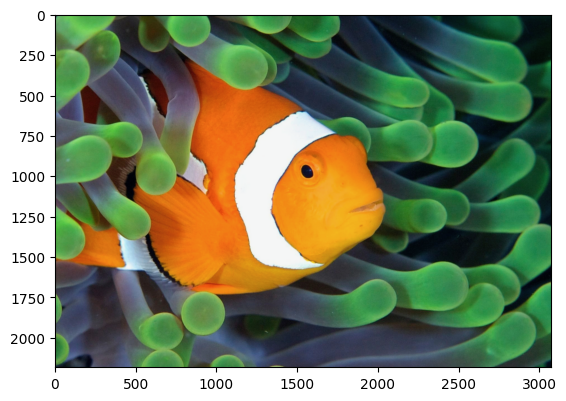

In [396]:
image = Image.open(str('tensorflow_tutorial\images\clown-fish.png')).convert('RGB')
plt.imshow(image)

In [401]:
def get_features(name):
    def hook(model, input, output):
        features[name] = output.detach()
    return hook

In [400]:
model.vision_model.visual.embeddings.patch_embedding.register_forward_hook(get_features('patchEmbed'))

In [379]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [413]:
processor = BridgeTowerProcessor.from_pretrained("BridgeTower/bridgetower-base")
model = BridgeTowerModel.from_pretrained("BridgeTower/bridgetower-base")

text = ""
inputs = processor(image, text, return_tensors='pt')

In [402]:
##### FEATURE EXTRACTION LOOP

# placeholders
PREDS = []
FEATS = []

# placeholder for batch features
features = {}
       
# forward pass [with feature extraction]
preds = model(**inputs)
    
# add feats and preds to lists
#PREDS.append(preds.detach().cpu().numpy())
FEATS.append(features['patchEmbed'].cpu().numpy())

In [409]:
patchEmbed = features['patchEmbed']

In [410]:
feature_map = patchEmbed.squeeze(0)
gray_scale = torch.sum(feature_map,0)
gray_scale = gray_scale / feature_map.shape[0]
fm = gray_scale.data.cpu().numpy()
print(fm.shape)

(18, 18)


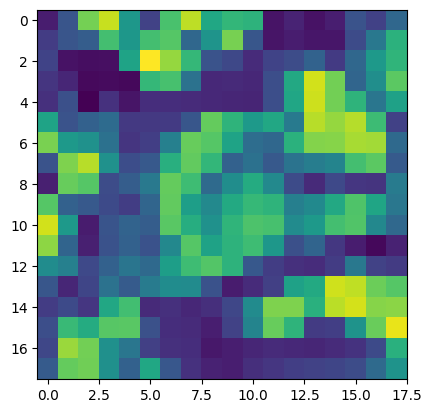

In [412]:
plt.imshow(fm)